# CIFAR-10 Image Classification Project

## Introduction
The CIFAR-10 dataset is a widely used dataset in computer vision and deep learning. It consists of 60,000 32x32 color images belonging to 10 different classes: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck. The goal of this project is to build a Convolutional Neural Network (CNN) to classify images into these categories.

### Project Objectives:
- Load and explore the CIFAR-10 dataset.
- Preprocess the images and labels for deep learning.
- Build and train a CNN model to classify images.
- Evaluate the model's performance on the test set.
- Save the trained model for future use.

### Loading Libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

### Load CIFAR-10 Dataset

In [8]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 495s 3us/step


### Print dataset shapes

In [20]:
print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)

Training data shape: (50000, 32, 32, 3) (50000, 1)
Testing data shape: (10000, 32, 32, 3) (10000, 1)


### Define class names

In [22]:
class_names = ["airplane", "automobile", "bird", "cat", "deer", 
               "dog", "frog", "horse", "ship", "truck"]

### Visualizing some sample images

In [ ]:
#!pip install opencv-python

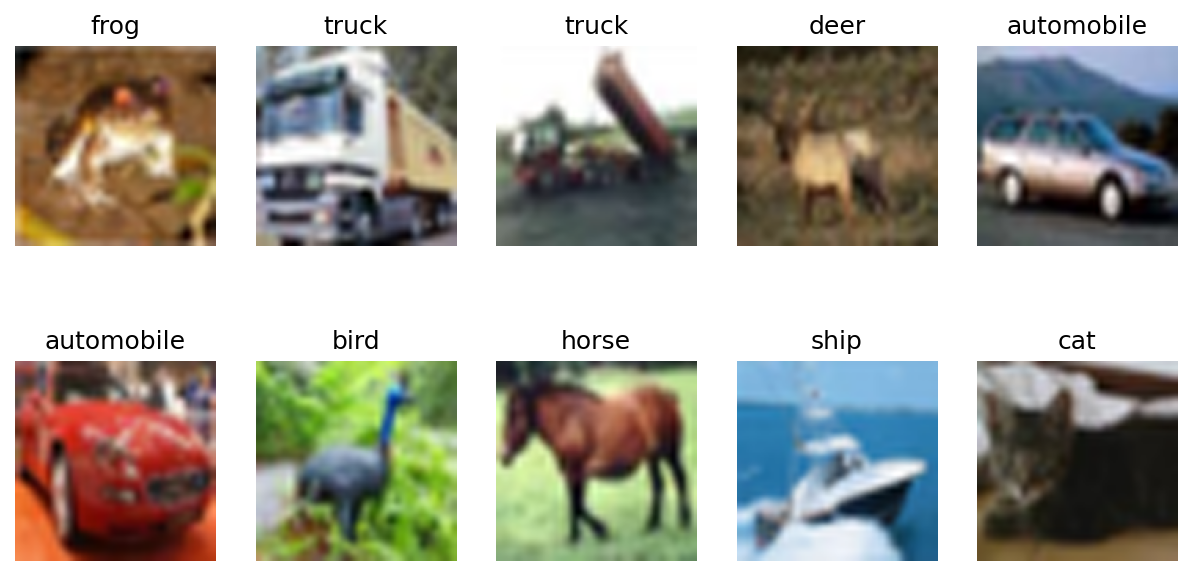

In [36]:
import cv2

plt.figure(figsize=(10, 5), dpi=150)
for i in range(10):
    plt.subplot(2, 5, i+1)
    img_resized = cv2.resize(X_train[i], (128, 128), interpolation=cv2.INTER_CUBIC)  # Upscale to 128x128
    plt.imshow(img_resized)
    plt.title(class_names[y_train[i][0]])
    plt.axis("off")
plt.show()

### Normalize pixel values

In [40]:
X_train = X_train / 255.0
X_test = X_test / 255.0

### Convert labels to one-hot encoding

In [42]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### Define CNN Model

In [44]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes
])

### Compile the model

In [46]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Train the model

In [48]:
history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test), batch_size=64)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 68ms/step - accuracy: 0.3382 - loss: 1.7896 - val_accuracy: 0.5042 - val_loss: 1.3809
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 53s 67ms/step - accuracy: 0.5669 - loss: 1.2201 - val_accuracy: 0.6119 - val_loss: 1.1032
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 75ms/step - accuracy: 0.6358 - loss: 1.0435 - val_accuracy: 0.6568 - val_loss: 0.9854
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 55s 71ms/step - accuracy: 0.6823 - loss: 0.9193 - val_accuracy: 0.6859 - val_loss: 0.9102
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 49s 63ms/step - accuracy: 0.7168 - loss: 0.8161 - val_accuracy: 0.6957 - val_loss: 0.8877
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 89s 72ms/step - accuracy: 0.7373 - loss: 0.7632 - val_accuracy: 0.7022 - val_loss: 0.8519
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 51s 65ms/step - accuracy: 0.7581 - loss: 0.6964 - val_accuracy: 0.7068 - val_loss: 0.8736
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 55s 70ms/step - accuracy: 0.7764 - loss: 0.6399 - 

### Evaluate the model

In [50]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7218 - loss: 0.8358
Test Accuracy: 0.72


### Save the model

In [54]:
model.save("cifar10_cnn_model.keras")

### Load & Test Model

In [57]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model("cifar10_cnn_model.keras")

# Evaluate on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy after loading: {test_acc:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7218 - loss: 0.8358
Test Accuracy after loading: 0.72


### Make Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


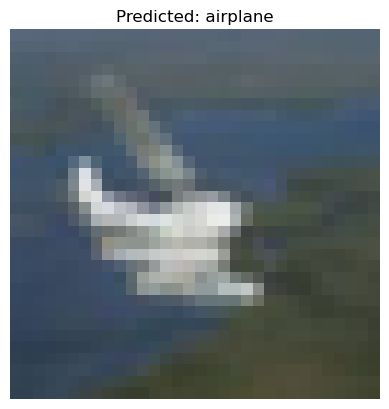

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Select a random test image
index = np.random.randint(len(X_test))
img = X_test[index]

# Make a prediction
prediction = model.predict(np.expand_dims(img, axis=0))
predicted_class = class_names[np.argmax(prediction)]

# Display the image with the predicted label
plt.imshow(img)
plt.title(f"Predicted: {predicted_class}")
plt.axis("off")
plt.show()

### Convert & Deploy Model

In [63]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("cifar10_model.tflite", "wb") as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\nms31\AppData\Local\Temp\tmptn9iwbrm\assets


INFO:tensorflow:Assets written to: C:\Users\nms31\AppData\Local\Temp\tmptn9iwbrm\assets


Saved artifact at 'C:\Users\nms31\AppData\Local\Temp\tmptn9iwbrm'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  2205117879824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2205117877904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2205117880400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2205117880784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2205117880208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2205117877712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2205117875792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2205117881360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2205117876176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2205117881552: TensorSpec(shape=(), dtype=tf.resource, name=None)


### Improved Model Accuracy

In [66]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
datagen.fit(X_train)